In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#import the data
#view top 10 
suicide_data= pd.read_csv("Suicide_Avr_Clean.csv")
suicide_data.head(10)

,LocationTime,Suicide_Val_TOT,Alcohol_Val,Edu_Sec_Val,Edu_Try_Val,Emp_Val,Healthy_Spend_Val,Obesity_Val,Pov_Val,Smoking_Val,Soc_Spend_Val,Soc_Sup_Val,Work_Hour_Val
0,ARG-1990,9,9,29,28,16354,212,48,0,22,3,87,1753
1,ARG-1991,8,9,29,28,16354,212,48,0,22,3,87,1753
2,ARG-1992,9,9,29,28,16354,212,48,0,22,3,87,1753
3,ARG-1993,9,9,29,28,16354,212,48,0,22,3,87,1753
4,ARG-1994,8,9,29,28,16354,212,48,0,22,3,87,1753
5,ARG-1995,8,9,29,28,16354,212,48,0,22,3,87,1753
6,ARG-1996,8,9,29,28,16354,212,48,0,22,3,87,1753
7,ARG-1997,8,9,29,28,16354,212,48,0,22,3,87,1753
8,ARG-1998,8,9,29,28,16354,212,48,0,22,3,87,1753
9,ARG-1999,8,9,29,28,16354,212,48,0,22,3,87,1753


In [8]:
suicide_predict=suicide_data.drop(columns=["LocationTime"])
suicide_predict

,Suicide_Val_TOT,Alcohol_Val,Edu_Sec_Val,Edu_Try_Val,Emp_Val,Healthy_Spend_Val,Obesity_Val,Pov_Val,Smoking_Val,Soc_Spend_Val,Soc_Sup_Val,Work_Hour_Val
0,9,9,29,28,16354,212,48,0,22,3,87,1753
1,8,9,29,28,16354,212,48,0,22,3,87,1753
2,9,9,29,28,16354,212,48,0,22,3,87,1753
3,9,9,29,28,16354,212,48,0,22,3,87,1753
4,8,9,29,28,16354,212,48,0,22,3,87,1753
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,1,7,59,12,16354,29,48,0,22,3,82,1753
1327,1,7,59,13,16354,29,48,0,20,3,82,1753
1328,0,7,58,13,16354,29,48,0,22,3,82,1753
1329,0,7,55,15,16354,28,48,0,22,3,82,1753


In [10]:
#Define the X and Y values
X = suicide_predict.drop(columns="Suicide_Val_TOT")
y = suicide_predict.Suicide_Val_TOT

In [11]:
X.shape

(1331, 11)

In [12]:
#Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, test_size=0.2, random_state=1)

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
#Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
#predict the results
y_pred = model.predict(X_test_scaled)
print(y_pred)

[13.46236991  4.20377249  9.2797449  11.83858567 15.12718478  9.38659448
 13.69451962 18.48297666 20.70131233 12.47813157 19.05986448 10.88196462
 13.76278724 15.42663006 15.60274642 23.95750809  3.90332726  2.90053606
  7.24597763 18.02981321 12.43661575 14.6947448  13.69451962 14.34801822
  7.1947124   8.78433082 10.61677353  9.93135606 11.40201733 14.2901294
 11.08403601 26.54153095 19.85090328 13.13578963 12.27993749 10.9670974
 16.61153639  7.19446007 10.92253546 16.40310102 13.0793799  17.16158063
 17.41502171  3.50958712 16.62777365 16.12711886 13.66077867 10.32802454
  8.66290414 20.14790013  7.66709622 13.11062714  8.87224424 16.58466418
 14.46158905 12.47960095 14.2614327  18.7261351   8.75865811  3.13193859
 18.90532519 20.68254009 -2.85767814  6.66790328 11.84327715 14.87346002
 21.84411561 17.94520308 12.19434638  3.90641375  8.28056753  6.91105206
 16.53797919 10.50994224  3.5329328  13.80800551 15.35423661 10.31977412
  6.77886898 12.17419602 14.5945167  17.7008516   8.5

In [16]:
print(model.coef_)
print(model.intercept_)

[ 3.72834714e+00 -2.51094528e+00  1.51948989e-01  4.97640617e-02
 -7.54638318e-02 -1.72287588e+00 -2.22044605e-16 -1.40675929e-01
 -6.48113277e-01 -9.44921660e-01  7.57829431e-01]
13.728383458646617


In [17]:
#calculating the R squared value
#shows how close the data has fit to the regression line
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3500601820381992

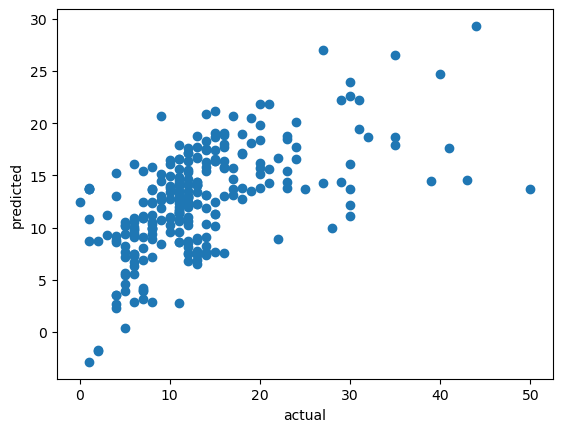

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [19]:
pred_y_df=pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
1258,13,13.462370,-0.462370
325,7,4.203772,2.796228
930,3,9.279745,-6.279745
1020,14,11.838586,2.161414
1154,9,15.127185,-6.127185
764,5,9.386594,-4.386594
120,17,13.694520,3.305480
65,23,18.482977,4.517023
777,17,20.701312,-3.701312
1124,8,12.478132,-4.478132
